<a href="https://colab.research.google.com/github/longevity-genie/just-agents/blob/main/examples/notebooks/01_just_agents_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial for just-agents library ##


This tutorial is designed to teach you using [just-agents](https://github.com/longevity-genie/just-agents/) library.

It is the first tutorial in a series of tutorials, next ones are:
1. Basic agents tutorial (THIS ONE) https://colab.research.google.com/drive/1l_pdfT0FhlzFzNV792xdiMD3xt0I660z
2. Database agent tutorial https://colab.research.google.com/drive/1FQGOfIytET5HlExxu4jdXHeOMJJDL0yg
3. Coding agent tutorial https://colab.research.google.com/drive/1CbqwSwUHir6VpWA0uKVIiqlZo6m2s6qm#scrollTo=xMh-QD4m8F7V

To start working with just-agents library you have to install it with pip:

In [ ]:
!pip install just-agents-core==0.4.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 913.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.2 MB/s eta 0:00:00


##About the key concepts of the library

1. This is a Colab - so anything that requires instalation will be installed not on your hardware but online and will be available just for this session

  1.1 There is a part where you download the code and YAML files but it does not include the dependecies- just what is found on Github page [https://github.com/longevity-genie/just-agents/tree/main]- on your Drive

2. library uses some basic classes that will be demonstrated in following examples.

3. main feature of the library is to simplify the coding of AI agents that can be used for various tasks and for such operations it sometimes uses yaml files

## Getting the keys

For this tutorials we will be using [Groq api](https://console.groq.com/keys) and LLAMA3_2 as it is free if you do not exceed the limit. You can go to [Groq console](https://console.groq.com/keys) to create a key

After you created a key, please provide it to this notebook by executing the cell below:

In [ ]:
import os
import getpass

def get_api_keys():
  """Gets API keys from the user."""
  print("Please enter your API keys:")
  groq_api_key = getpass.getpass("GROQ_API_KEY: ")
  # Set environment variables
  os.environ["GROQ_API_KEY"] = groq_api_key
  print("API keys set successfully.")

# Call the function to get API keys from the user
get_api_keys()


Please enter your API keys:
GROQ_API_KEY: ··········
API keys set successfully.


#Basic examples, calling a function


Now, let make our hello-world by creating a simple agent which can use a tool.

For simplicity we will write a mock `get_current_weather` function that will return some predefined value. Such function can be changed in the future to real one, which will call weather API of some of the websites. We will use JSON as function output as it is a common format of REST API responses.

In [ ]:
import json
"""
This example shows how a function can be used to call a function which potentially can have an external API call.
"""
def get_current_weather(location: str):
    """Gets the current weather in a given location"""
    if "tokyo" in location.lower():
        return json.dumps({"location": "Tokyo", "temperature": "10", "unit": "celsius"})
    elif "san francisco" in location.lower():
        return json.dumps({"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"})
    elif "paris" in location.lower():
        return json.dumps({"location": "Paris", "temperature": "22", "unit": "celsius"})
    else:
        return json.dumps({"location": location, "temperature": "unknown"})

First you have to configure the model that we want to use. Here we will use LLAMA3_2 on top of Groq API as it is free (until you exceed the rate limit) and good enough to call functions.


In [ ]:
from just_agents import llm_options

llm_options: dict = llm_options.LLAMA3_3

"""
llm_options here are just dictionary of the following form:

LLAMA3_2: Dict = {
    "model": "groq/llama-3.2-90b-vision-preview",
    "api_base": "https://api.groq.com/openai/v1",
    "temperature": 0.0,
    "tools": []
}
"""

'\nllm_options here are just dictionary of the following form:\n\nLLAMA3_2: Dict = {\n    "model": "groq/llama-3.2-90b-text-preview",\n    "api_base": "https://api.groq.com/openai/v1",\n    "temperature": 0.0,\n    "tools": []\n}\n'

In fact you can add any model you want if it is supported by LiteLLM library on top of which we are building by filling the dictionary with parameters from https://docs.litellm.ai/docs/providers

Now, let's initiate the LLMSession which is a class that interacts with LLM

In [ ]:
from just_agents.base_agent import BaseAgent


prompt = "What's the weather like in San Francisco, Tokyo, and Paris?"

agent: BaseAgent = BaseAgent(
    llm_options=llm_options,
    tools=[get_current_weather]
)

response = agent.query(prompt)
f"""MODEL RESPONSE = "{response}" """

'MODEL RESPONSE = "The current weather in San Francisco is 72 degrees Fahrenheit. The current weather in Tokyo is 10 degrees Celsius. The current weather in Paris is 22 degrees Celsius." '

## Understanding the inner mechanics

Now let's try understand how it works and what is happening.
BaseAgent has memory of messages it got from the user (or other agents) and that it generated from LLM or tools.
You can subscribe to the messages with:

In [ ]:
import pprint
agent.memory.add_on_message(lambda m: pprint.pprint(m))
agent.query(prompt)


{'content': "What's the weather like in San Francisco, Tokyo, and Paris?",
 'role': 'user'}
{'role': 'assistant',
 'tool_calls': [{'function': {'arguments': '{"location": "San Francisco"}',
                              'name': 'get_current_weather'},
                 'id': 'call_5ap6',
                 'type': 'function'},
                {'function': {'arguments': '{"location": "Tokyo"}',
                              'name': 'get_current_weather'},
                 'id': 'call_8ehf',
                 'type': 'function'},
                {'function': {'arguments': '{"location": "Paris"}',
                              'name': 'get_current_weather'},
                 'id': 'call_h5rw',
                 'type': 'function'}]}
{'content': '{"location": "San Francisco", "temperature": "72", "unit": '
            '"fahrenheit"}',
 'name': 'get_current_weather',
 'role': 'tool',
 'tool_call_id': 'call_5ap6'}
{'content': '{"location": "Tokyo", "temperature": "10", "unit": "celsius"}',
 'name

'The current weather in San Francisco is 72 degrees Fahrenheit. The current weather in Tokyo is 10 degrees Celsius. The current weather in Paris is 22 degrees Celsius.'

Now, together with the final result (in the end) you can see that everything is represented as JSON messages that have 'role' and 'content' properties and some other properties depending on the type.
Roles can be:
* *user* - message sent by the user
* *assistant* - LLM answer. It can also contain  'tool_calls' when assistant things that to get the answer it needs to call some functions. It can only generate text, so it cannot call functions inside of it. But it can generate json that your code will parse.
* *tool* - when you got an assistant message with non-empty tool_calls LLMSession code parses the tool_calls, searches if such functions exist (parameter tools on initialization) and if yes - tries to call them. The result has "tool" role. After LLM gets results from all required tools it can get the final answer or ask to call even more tools

------------------------------------------------------
##Task for you:

Write a custom function that LLM will call. It can be a function that calls real weather API from the internet but can also be anything you want.


In [ ]:
from just_agents.base_agent import BaseAgent
from just_agents import llm_options


def get_weather_by_city(city: str):

  # you can change the name of the function in case if you want to do something else
  """Weather prediction by winter lover"""

  # provide implementation here
  return "Weather is snowy, there were numerous frozen lakes"

session: BaseAgent = BaseAgent(
    llm_options=llm_options.LLAMA3_3,
    tools=[get_weather_by_city]
    #if you rename the function, then do not forget to change here
)

prompt = "What's the weather like in Rostock? And where we did you get the info from?"
#if you implement something else then weather change the prompt

response = session.query(prompt)
f"""MODEL RESPONSE = "{response}" """

'MODEL RESPONSE = "I obtained the weather information for Rostock from the \'get_weather_by_city\' function, which is described as \'Weather prediction by winter lover\'." '

Example implementation

In [ ]:
import requests
import json
import re

def get_city_coordinates(city_name: str):
    """Fetches latitude and longitude for a given city using Nominatim API with User-Agent header."""
    try:
        base_url = "https://nominatim.openstreetmap.org/search"
        params = {
            "q": city_name,
            "format": "json",
            "limit": 1
        }
        headers = {
            "User-Agent": "just-agents/1.0 (maria@example.com)"
        }

        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()
        data = response.json()

        if not data:
            return None

        latitude = float(data[0]["lat"])
        longitude = float(data[0]["lon"])
        return {"latitude": latitude, "longitude": longitude}

    except requests.RequestException as e:
        print(f"Error fetching coordinates: {e}")
        return None

def get_weather_by_city(city: str):
    """Gets the current weather by a city name"""

    coordinates = get_city_coordinates(city)

    if not coordinates:
        return json.dumps({
            "error": f"Could not find coordinates for {city}."
        })

    latitude = coordinates["latitude"]
    longitude = coordinates["longitude"]

    base_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "current_weather": "true"
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()

        current_weather = data.get("current_weather", {})
        temperature = current_weather.get("temperature", "N/A")
        windspeed = current_weather.get("windspeed", "N/A")
        description = f"Windspeed: {windspeed} km/h"

        result = json.dumps({
            "city": city,
            "temperature": str(temperature),
            "unit": "celsius",
            "description": description
        }, indent=2)
        return result

    except requests.RequestException as e:
        return json.dumps({
            "error": f"Could not fetch weather data: {str(e)}"
        })


Let's check that the function works on test data first

In [ ]:
get_weather_by_city("Berlin")

'{\n  "city": "Berlin",\n  "temperature": "7.9",\n  "unit": "celsius",\n  "description": "Windspeed: 12.4 km/h"\n}'

Now, let's call:

In [ ]:
from just_agents.base_agent import BaseAgent
from just_agents import llm_options

session: BaseAgent = BaseAgent(
    llm_options=llm_options.LLAMA3_3,
    tools=[get_weather_by_city]
    #if you rename the function, then do not forget to change here
)

prompt = "What's the weather like in Brasil?"
#if you implement something else then weather change the prompt

response = session.query(prompt)
f"""MODEL RESPONSE = "{response}" """

'MODEL RESPONSE = "The current weather in Brasilia, Brasil is 26.8 degrees Celsius with a windspeed of 6.6 km/h." '

#Introduction of Agents


LLMs often perform better when they are instructed to take the role that is close to the task yoou want them to accomplish. For example, LLM with a role of scientist would answer scientific questions better and in more academic style.

We provide the `Agent` class for the basic agent implementation.
Agents can be initialized with code (like LLMSession which you saw before). However, if you optimize your prompts frequently, it can be easier to track prompt changes separately from the code. For this reason agents can be serializes and deserialized to easty to read yaml files.

An example agent looks like [https://github.com/longevity-genie/just-agents/blob/main/examples/basic/agent_from_yaml.yaml](https://github.com/longevity-genie/just-agents/blob/main/examples/basic/agent_from_yaml.yaml)



In [ ]:
!wget https://raw.githubusercontent.com/longevity-genie/just-agents/refs/heads/main/examples/just_agents/examples/basic/agent_profiles.yaml -O agent_profiles.yaml


--2024-11-14 15:58:01--  https://raw.githubusercontent.com/longevity-genie/just-agents/main/examples/basic/agent_from_yaml.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 313 [text/plain]
Saving to: ‘agent_from_yaml.yaml’

agent_from_yaml.yam 100%[===================>]     313  --.-KB/s    in 0s      

2024-11-14 15:58:02 (14.7 MB/s) - ‘agent_from_yaml.yaml’ saved [313/313]



In [ ]:
import yaml

with open("agent_profiles.yaml", "r") as file:
    data = yaml.safe_load(file)

# Display the data as YAML
yaml_content = yaml.dump(data, sort_keys=False)
print(yaml_content)

system_prompt: You are helpful assistant that could count letters in word. To acomplish
  this use tool letter_count()
options:
  model: groq/llama-3.1-70b-versatile
  api_base: https://api.groq.com/openai/v1
  temperature: 0.0
tools:
- package: examples.tools.letter_count
  function: letter_count



Here you can see that we provide the system prompt with basic instructions, configure LLM options and provide tools that it can call. We should also check if the tools agent uses are availible. In our case it uses built-in example letter_count function which we do not have to import

In [ ]:

from just_agents.patterns.chain_of_throught import ChainOfThoughtAgent
agent = ChainOfThoughtAgent.from_yaml("ChainOfThoughtAgent", file_path="agent_profiles.yaml")
# Add a callback to print all messages that the agent processes
agent.memory.add_on_message(lambda message: print(message))

# Ask the agent to solve a problem
# The think() method returns two things:
# - result: The final answer
# - chain: The step-by-step reasoning process (list of thoughts)
(result, chain) = agent.think("Count the number of occurrences of the letter 'L' in the word - 'LOLLAPALOOZA'.")

# Print the final result and the chain of thoughts
print("==========Final result:==========")
print(result)
print("==========Chain of thoughts:==========")
pprint.pprint(chain)

Calling letter_count('STRAWBERRY', 'R')
The letter 'R' appears 3 times in the word 'STRAWBERRY'.


#Communication of several agents

The main power of agentic approach that you can simulate a team-work by having LLM agents with different instructions (and sometimes even - models) interaction with each other to accomplish the shared task similar to what you do in teams of people.
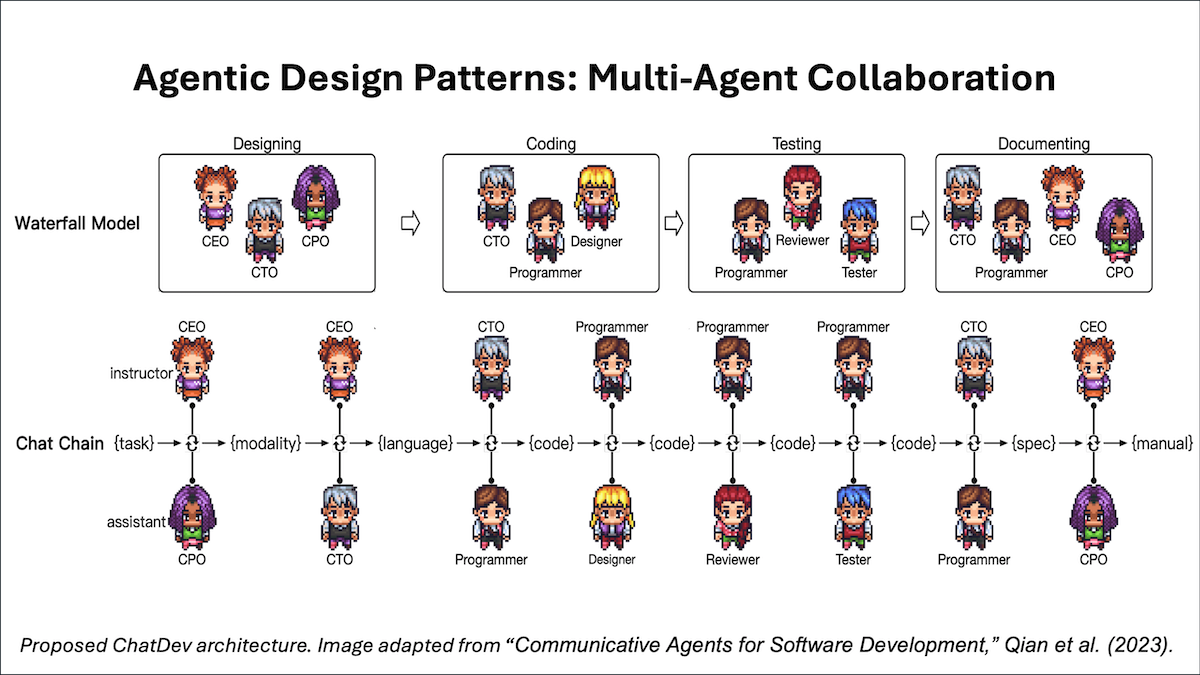

Let's first do something simple by leting agents talking to each other. Here we will also assign different models to them.

If you try to avoid proprietory models feel free to just use LLAMA3 or any other models from GROQ. Here for simplicity we use Mixstral as a second model, however, more powerful models like ChatGPT4o-mini provide more realistic conversation. For example for ChatGPT you can use the key from [https://platform.openai.com/docs/overview](https://platform.openai.com/docs/overview)

In [ ]:
from just_agents import llm_options

kamala_options = llm_options.LLAMA3_3
trump_options: dict = {
    "model": "groq/mixtral-8x7b-32768",
    "api_base": "https://api.groq.com/openai/v1",
    "temperature": 0.0,
    "tools": []
}

'''
#uncomment if you want to use chat-gpt instead
openai_api_key = getpass.getpass("OPENAI_API_KEY: ")

# Set environment variables
os.environ["OPENAI_API_KEY"] = openai_api_key
trump_options = llm_options.OPENAI_GPT4oMINI
'''

'\n#uncomment if you want to use chat-gpt instead\nopenai_api_key = getpass.getpass("OPENAI_API_KEY: ")\n\n# Set environment variables\nos.environ["OPENAI_API_KEY"] = openai_api_key\ntrump_options = OPENAI_GPT4oMINI\n'

In [ ]:
from just_agents.simple.chat_agent import ChatAgent
from just_agents.llm_options import LLAMA3_2_VISION, OPENAI_GPT4oMINI
from IPython.display import display, Markdown


Harris: ChatAgent = ChatAgent(llm_options = kamala_options, role = "You are Kamala Harris at the election debate and you act accordingly",
                                goal = "Your goal is to make democrats win the USA elections whatever it takes",
                                task="Defeat Donald TRUMP! Use Kamala Harris style of communication")
Trump: ChatAgent = ChatAgent(llm_options = trump_options,
                                role = "You are Donald Trump at the election debate",
                                goal="earn profit by being the president of USA",
                                task="Make America great again!  Use Trump style of communication")


exchanges = 2


Harris_reply = "Hi."
for _ in range(exchanges):
    Trump_reply = Trump.query(Harris_reply)
    print(f"TRUMP: {Trump_reply}\n")
    Harris_reply = Harris.query(Trump_reply)
    print(f"HARRIS: {Harris_reply}\n")

debate=str(Harris.memory.messages)
summary = Trump.query(f'Summarise the following debatein less than 30 words: {debate}')
print(f"SUMMARY:\n {summary}")

"Kamala Harris challenges Donald Trump's record on law enforcement, veterans' support, healthcare, and the economy, accusing him of prioritizing the wealthy over working families. Trump defends his record, touting job creation, economic growth, and support for law enforcement and veterans. Harris insists that Trump is not telling the truth and that he has not done enough for working families."

## Task for you
Add a moderator to the debate so the debates will have some structure

In [ ]:
Harris: ChatAgent = ChatAgent(llm_options = kamala_options, role = "You are Kamala Harris at the election debate and you act accordingly",
                                goal = "Your goal is to make democrats win the USA elections whatever it takes",
                                task="Defeat Donald TRUMP! Use Kamala Harris style of communication")
Trump: ChatAgent = ChatAgent(llm_options = trump_options,
                                  role = "You are Donald Trump at the election debate",
                                  goal="earn profit by being the president of USA",
                                  task="Make America great again!  Use Trump style of communication")
Moderator: ChatAgent = #YOUR CODE HERE

exchanges = 2

Moderator.memory.add_on_message(
    lambda m: display(Markdown(f"**Trump:** {m['content']}")) if m["role"] == "user" else display(Markdown(f"**Harris:** {m['content']}"))
)

Harris.memory.add_on_message(
    lambda m: display(Markdown(f"**Trump:** {m['content']}")) if m["role"] == "user" else display(Markdown(f"**Harris:** {m['content']}"))
)


for _ in range(exchanges):
    pass
    # WRITE THE CODE THAT WILL HAVE A STRUCTURED DEBATE WITH 3 AGENTS